Notebook on NMF: Non-negative Matrix Factorization
---

**NMF** splits up a non-negative data matrix ($\mathbf{X}$) into two smaller rank matrices $\mathbf{W}$ and $\mathbf{H}$
It minimizes the following function:

$$
\Vert \mathbf{X} - \mathbf{W} \times \mathbf{H} \Vert_2
$$

**NMF** starts with either random or specified initialization of $\mathbf{W}$ and $\mathbf{H}$.

Finally, **NMF** estimates $\mathbf{W}$ and $\mathbf{H}$ that approvimate $\mathbf{X}$.

In [1]:
import NMF
import NMFk
import Mads
import Random
Random.seed!(2020)

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-15970285419289047496\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-13047712196857208630\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-15970285419289047496\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

MersenneTwister(2020)

Let us generate 3 random signals:

In [16]:
a = rand(15)
b = rand(15)
c = rand(15)
[a b c]

15×3 Matrix{Float64}:
 0.235984   0.940464   0.0774279
 0.0229888  0.852907   0.288188
 0.211933   0.887821   0.361363
 0.660421   0.0356973  0.543867
 0.260365   0.579012   0.458068
 0.988144   0.679557   0.873937
 0.470737   0.526804   0.848666
 0.285886   0.05066    0.881731
 0.924109   0.645181   0.290938
 0.440072   0.434146   0.509067
 0.589086   0.0146767  0.363269
 0.61236    0.656092   0.173289
 0.360183   0.149943   0.249614
 0.167571   0.127686   0.450415
 0.533005   0.738992   0.867222

The singals look like this:

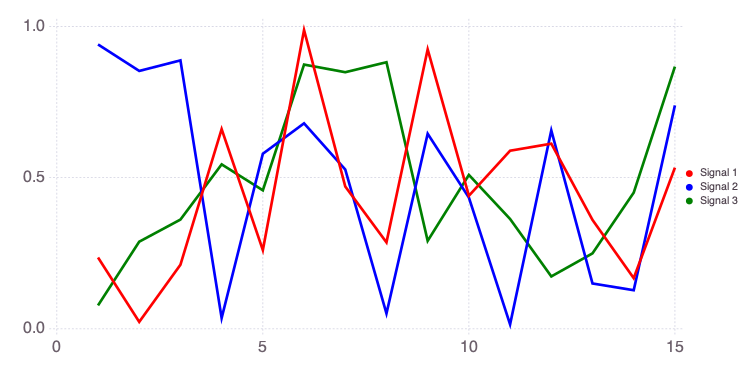

In [17]:
import Cairo
Mads.plotseries([a b c])

We can collect the 3 signal vectors into a signal matrix `W`:

In [18]:
W = [a b c]

15×3 Matrix{Float64}:
 0.235984   0.940464   0.0774279
 0.0229888  0.852907   0.288188
 0.211933   0.887821   0.361363
 0.660421   0.0356973  0.543867
 0.260365   0.579012   0.458068
 0.988144   0.679557   0.873937
 0.470737   0.526804   0.848666
 0.285886   0.05066    0.881731
 0.924109   0.645181   0.290938
 0.440072   0.434146   0.509067
 0.589086   0.0146767  0.363269
 0.61236    0.656092   0.173289
 0.360183   0.149943   0.249614
 0.167571   0.127686   0.450415
 0.533005   0.738992   0.867222

Now we can mix the signals in matrix `W` to produce a data matrix `X` representing data collected at 5 sensors (e.g., measurement devices or wells at different locations).

Each of the 5 sensors is observing some mixture of the signals in `W`.

The way the 3 signals are mixed at the sensors is represented by the mixing matrix `H`.

Let us define the mixing matrix `H` as:

In [19]:
H = [1 10 0 0 1; 0 1 1 5 2; 3 0 0 1 5]

3×5 Matrix{Int64}:
 1  10  0  0  1
 0   1  1  5  2
 3   0  0  1  5

Each column of the `H` matrix defines how the 3 signals are represented in each sensors.

For example, the first sensor (column 1 above) detects only Signals 1 and 3; Signal 2 is missing because `H[2,1]` is equal to zero.

The second sensor (column 2 above) detects Signals 1 and 2; Signal 3 is missing because `H[3,2]` is equal to zero.

The entries of `H` matrix also define the proportions at which the signals are mixed.

For example, the first sensor (column 1 above) detects Signal 3 times stronger than Signal 1.

The data matrix `X` is formed by multiplying `W` and `H` matrices. `X` defines the actual data observed.

In [20]:
X = W * H

15×5 Matrix{Float64}:
 0.468267   3.3003   0.940464   4.77975   2.50405
 0.887554   1.08279  0.852907   4.55272   3.16974
 1.29602    3.00715  0.887821   4.80047   3.79439
 2.29202    6.63991  0.0356973  0.722353  3.45115
 1.63457    3.18266  0.579012   3.35313   3.70873
 3.60996   10.561    0.679557   4.27172   6.71694
 3.01674    5.23417  0.526804   3.48269   5.76768
 2.93108    2.90952  0.05066    1.13503   4.79586
 1.79692    9.88627  0.645181   3.51684   3.66916
 1.96727    4.83487  0.434146   2.6798    3.8537
 1.67889    5.90553  0.0146767  0.436653  2.43478
 1.13223    6.77969  0.656092   3.45375   2.79099
 1.10903    3.75177  0.149943   0.99933   1.90814
 1.51882    1.8034   0.127686   1.08884   2.67502
 3.13467    6.06904  0.738992   4.56218   6.3471

The data matrix `X` looks like this:

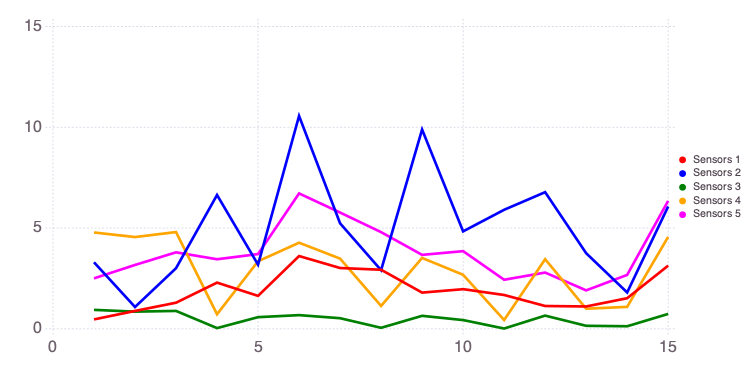

In [21]:
Mads.plotseries(X; name="Sensors")

Now, we can assume that we only know the data matrix `X` and the `W` and `H` matrices are unknown.

We can execute **NMF** and analyze the data matrix `X`.

**NMF** will automatically:

- identify the number of the unknown mixed signals in `X` 
- estimate the shape of the unknown mixed signals (i.e., estimate the entries of `W` matrix)
- estimate how the signals are mixed at the 5 sensors (i.e., estimate the entries of `H` matrix)

This can be done based only on the information in `X`:

### NMF using high-level function call (NMF.nnmf):

In [22]:
k = 3
nmfresults = NMF.nnmf(X, k; alg=:multmse, maxiter=1000, tol=1.0e-4)
We = nmfresults.W
He = nmfresults.H
println("NMF iterations:", nmfresults.niters)
println("NMF convergence: ", nmfresults.converged)
println("NMF objective function: ", nmfresults.objvalue)

NMF iterations:223
NMF convergence: true
NMF objective function: 0.05694807384548211


**NMF** returns an object containing `W`, `H`, no. iteration for the convergence, convergence status, and objective function value

In [23]:
We

15×3 Matrix{Float64}:
 0.705943  1.23447      1.14198e-10
 0.232736  1.23332      0.402507
 0.648945  1.25261      0.437787
 1.43738   2.79988e-15  0.607298
 0.687024  0.844999     0.595452
 2.28257   0.908489     0.952253
 1.1301    0.824188     1.14513
 0.627491  0.230466     1.31119
 2.14343   0.730031     0.000758628
 1.04458   0.615638     0.610709
 1.27474   2.86689e-30  0.326475
 1.46123   0.779961     2.31603e-8
 0.811118  0.179596     0.241257
 0.389057  0.251095     0.653603
 1.31049   1.10266      1.13413

In [24]:
He

3×5 Matrix{Float64}:
 0.812849    4.62294     0.0279133    0.428679    1.20347
 0.00176037  0.00202609  0.689634     3.61726     1.39263
 1.83235     0.0078256   9.65064e-15  0.00289689  2.84581

Note that the order of columns ('signals') in `W` and `We[kopt]` are not expected to match.

Also note that the order of rows ('sensors') in `H` and `He[kopt]` are also not expected to match.

The estimated order of 'signals' will be different every time the code is executed.

Below are plots providing comparisons between the original and estimated `W` an `H` matrices.


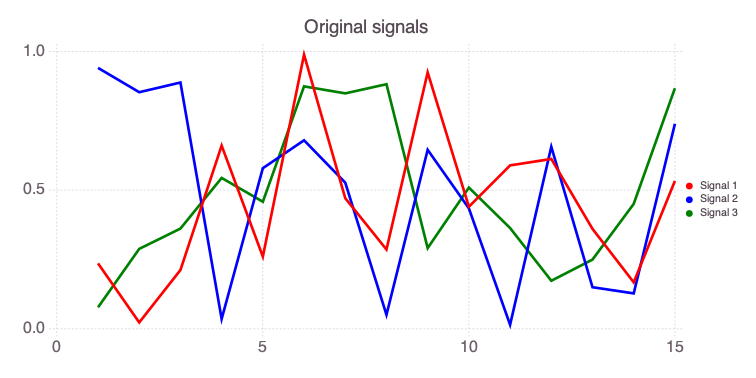

In [25]:
Mads.plotseries(W; title="Original signals")

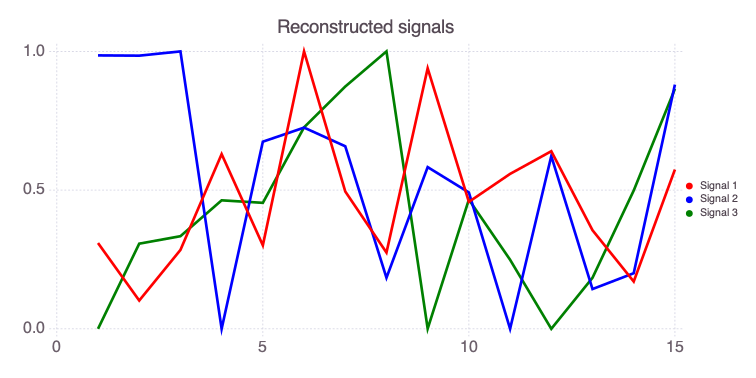

In [26]:
Mads.plotseries(We ./ maximum(We; dims=1); title="Reconstructed signals")

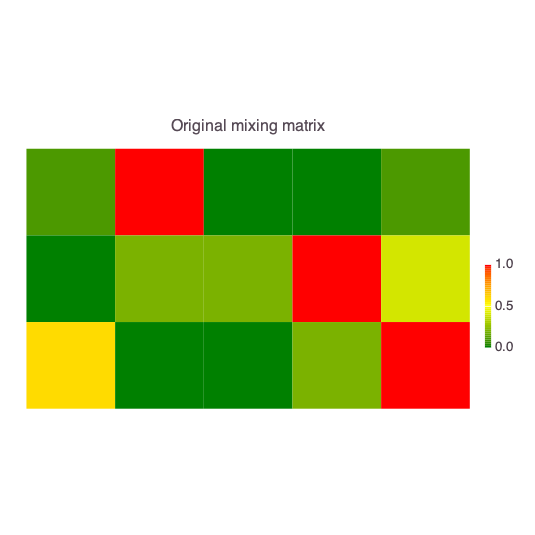

In [27]:
NMFk.plotmatrix(H ./ maximum(H; dims=2); title="Original mixing matrix")

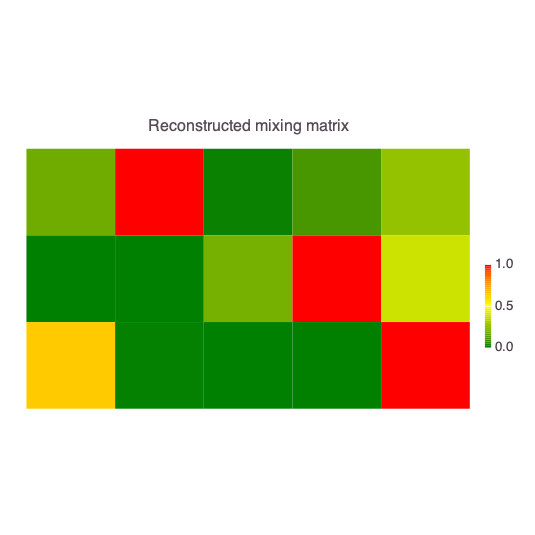

In [28]:
NMFk.plotmatrix(He ./ maximum(He; dims=2); title="Reconstructed mixing matrix")